In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Convolution2D

In [ ]:
from tensorflow.keras.layers import MaxPooling2D

In [ ]:
from tensorflow.keras.layers import Flatten

In [ ]:
from tensorflow.keras.layers import Dense

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
Classifier=Sequential()

In [ ]:
Classifier.add(Convolution2D(32,3,3,input_shape=(208,208,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Convolution2D(128,3,3,activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Flatten())
Classifier.add(Dense(256, activation='relu'))
Classifier.add(Dense(2, activation='softmax'))

Classifier.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
Classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 69, 69, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 34, 34, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 256)               8

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset-20221013T025357Z-001/Dataset/train',target_size=(208,208),batch_size=32,class_mode='categorical')

Found 387 images belonging to 2 classes.


In [ ]:
test_set=test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset-20221013T025357Z-001/Dataset/test',target_size=(208,208),batch_size=32,class_mode='categorical')

Found 104 images belonging to 2 classes.


In [ ]:
from IPython.display import display

In [ ]:
img_dims = 150
epochs = 2
batch_size = 32

In [ ]:
#pip install Pillow 

In [ ]:
from PIL import Image

In [ ]:
Classifier.fit_generator( training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size)

Epoch 1/2
12/12 [==============================] - 53s 4s/step - loss: 0.7499 - accuracy: 0.6282 - val_loss: 0.4351 - val_accuracy: 0.9896
Epoch 2/2
12/12 [==============================] - 4s 313ms/step - loss: 0.2842 - accuracy: 0.9408 - val_loss: 0.0580 - val_accuracy: 1.0000


In [ ]:
import h5py

In [ ]:
Classifier.save('alzhimer5.h5')
       

In [ ]:
from keras.models import load_model

In [ ]:
model=load_model('alzhimer5.h5')

In [ ]:
import numpy as np 

In [ ]:
from tensorflow.keras.preprocessing import image
test_image=image.load_img('/content/drive/MyDrive/Dataset-20221013T025357Z-001/Dataset/test/Demented/verymildDem1466.jpg',target_size=(208,208))

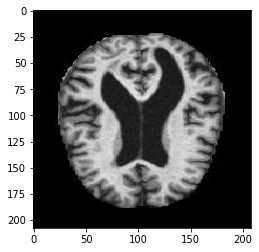

In [ ]:
import matplotlib.pyplot as plt
img = plt.imshow(test_image)

In [ ]:
test_image=image.img_to_array(test_image)

In [ ]:
test_image=np.expand_dims(test_image,axis=0)

In [ ]:
result=model.predict(test_image)

1/1 [==============================] - 0s 99ms/step


In [ ]:
prediction = result[0]

In [ ]:
classes=training_set.class_indices

In [ ]:
classes

{'Demented': 0, 'NonDemented': 1}

In [ ]:
prediction=list(prediction)

In [ ]:
prediction

[1.0, 0.0]

In [ ]:
classes=['Demented', 'NonDemented']

In [ ]:
output=zip(classes,prediction)

In [ ]:
output=dict(output)

In [ ]:
output

{'Demented': 1.0, 'NonDemented': 0.0}

In [ ]:
if output['Demented']==1.0 :
    print("Demented")
elif output['NonDemented']==1.0:
    print("NonDemented")

Demented
